In [ ]:
import time
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Activity Data Extraction**

## Data Extraction for training

In [ ]:
train_msAcc = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/training/trainMSAccelerometer.npy")
train_msGyr = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/training/trainMSGyroscope.npy")
train_labels = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/training/trainLabels.npy")

In [ ]:
train_msAcc.shape, train_msGyr.shape, train_labels.shape

((2284, 268, 3), (2284, 268, 3), (2284,))

In [ ]:
type(train_msAcc), type(train_msGyr), type(train_labels)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
np.unique(train_msAcc), np.unique(train_msGyr), np.unique(train_labels)

(array([-7.991211 , -7.9902344, -7.986328 , ...,  7.8398438,  7.9375   ,
         7.9990234], dtype=float32),
 array([-998.65857, -998.62805, -998.5976 , ...,  998.8415 ,  998.90247,
         998.9939 ], dtype=float32),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54]))

In [ ]:
# indexes = np.where(train_labels == 25)[0]
indexes = np.where(train_labels == 9)[0]

print(f"Indexes where train_labels is equal to 9: {indexes}, \n {len(indexes)}")

Indexes where train_labels is equal to 9: [  97  216  396  479  858  940 1125 1188 1284 1530 1660 1715 1830 1882
 1988 2013 2016 2024 2046 2056], 
 20


In [ ]:
train_msAcc = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/training/trainMSAccelerometer.npy")
train_msGyr = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/training/trainMSGyroscope.npy")
train_labels = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/training/trainLabels.npy")

CLOSE_TAP_WATER = 9
OPEN_TAP_WATER = 25

train_labels_CLOSE_TAP_WATER_idx = train_labels == CLOSE_TAP_WATER
train_labels_OPEN_TAP_WATER_idx = train_labels == OPEN_TAP_WATER

train_msAcc_CLOSE_TAP_WATER = train_msAcc[train_labels_CLOSE_TAP_WATER_idx]
train_msGyr_CLOSE_TAP_WATER = train_msGyr[train_labels_CLOSE_TAP_WATER_idx]

train_msAcc_OPEN_TAP_WATER = train_msAcc[train_labels_OPEN_TAP_WATER_idx]
train_msGyr_OPEN_TAP_WATER = train_msGyr[train_labels_OPEN_TAP_WATER_idx]

train_labels_CLOSE_TAP_WATER = train_labels[train_labels_CLOSE_TAP_WATER_idx]
train_labels_OPEN_TAP_WATER = train_labels[train_labels_OPEN_TAP_WATER_idx]

train_msAcc_Two_Activities = np.concatenate((train_msAcc_CLOSE_TAP_WATER, train_msAcc_OPEN_TAP_WATER))
train_msGyr_Two_Activities = np.concatenate((train_msGyr_CLOSE_TAP_WATER, train_msGyr_OPEN_TAP_WATER))
train_labels_Two_Activities = np.concatenate((train_labels_CLOSE_TAP_WATER, train_labels_OPEN_TAP_WATER))

np.save("/content/drive/MyDrive/cogage/activity_extracted/train_MSAccelerometer_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy", train_msAcc_Two_Activities)
np.save("/content/drive/MyDrive/cogage/activity_extracted/train_MSGyroscope_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy", train_msGyr_Two_Activities)
np.save("/content/drive/MyDrive/cogage/activity_extracted/train_labels_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy", train_labels_Two_Activities)

## Data Extraction for Testing

In [ ]:
test_msAcc = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/testing/testMSAccelerometer.npy")
test_msGyr = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/testing/testMSGyroscope.npy")
test_labels = np.load(r"/content/drive/MyDrive/cogage/cogage_bbh/bbh/testing/testLabels.npy")


CLOSE_TAP_WATER = 9
OPEN_TAP_WATER = 25

test_labels_CLOSE_TAP_WATER_idx = test_labels == CLOSE_TAP_WATER
test_labels_OPEN_TAP_WATER_idx = test_labels == OPEN_TAP_WATER

test_msAcc_CLOSE_TAP_WATER = test_msAcc[test_labels_CLOSE_TAP_WATER_idx]
test_msGyr_CLOSE_TAP_WATER = test_msGyr[test_labels_CLOSE_TAP_WATER_idx]

test_msAcc_OPEN_TAP_WATER = test_msAcc[test_labels_OPEN_TAP_WATER_idx]
test_msGyr_OPEN_TAP_WATER = test_msGyr[test_labels_OPEN_TAP_WATER_idx]

test_labels_CLOSE_TAP_WATER = test_labels[test_labels_CLOSE_TAP_WATER_idx]
test_labels_OPEN_TAP_WATER = test_labels[test_labels_OPEN_TAP_WATER_idx]

test_msAcc_Two_Activities = np.concatenate((test_msAcc_CLOSE_TAP_WATER, test_msAcc_OPEN_TAP_WATER))
test_msGyr_Two_Activities = np.concatenate((test_msGyr_CLOSE_TAP_WATER, test_msGyr_OPEN_TAP_WATER))
test_labels_Two_Activities = np.concatenate((test_labels_CLOSE_TAP_WATER, test_labels_OPEN_TAP_WATER))

np.save("/content/drive/MyDrive/cogage/activity_extracted/test_MSAccelerometer_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy", test_msAcc_Two_Activities)
np.save("/content/drive/MyDrive/cogage/activity_extracted/test_MSGyroscope_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy", test_msGyr_Two_Activities)
np.save("/content/drive/MyDrive/cogage/activity_extracted/test_labels_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy", test_labels_Two_Activities)

In [ ]:
#specify path of the dataset folder
path = "/content/drive/MyDrive/Activity Monitoring/bbh/Activities Extracted/"

train_msAcc_path = "/content/drive/MyDrive/cogage/activity_extracted/train_MSAccelerometer_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy"
train_msGyr_path = "/content/drive/MyDrive/cogage/activity_extracted/train_MSGyroscope_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy"
train_labels_path = "/content/drive/MyDrive/cogage/activity_extracted/train_labels_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy"

test_msAcc_path = "/content/drive/MyDrive/cogage/activity_extracted/test_MSAccelerometer_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy"
test_msGyr_path = "/content/drive/MyDrive/cogage/activity_extracted/test_MSGyroscope_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy"
test_msLabels_path = "/content/drive/MyDrive/cogage/activity_extracted/test_labels_CLOSE_TAP_WATER_OPEN_TAP_WATER.npy"

# Loading Extracted Data

In [ ]:
train_msAcc = np.load(train_msAcc_path)
train_msGyro = np.load(train_msGyr_path)
train_labels = np.load(train_labels_path)

test_msAcc = np.load(test_msAcc_path)
test_msGyro = np.load(test_msGyr_path)
test_labels = np.load(test_msLabels_path)

# Pre-Processing

In [ ]:
#print the shapes of all data arrays
print(np.shape(train_msAcc))
print(np.shape(train_msGyro))
print(np.shape(train_labels))

print(np.shape(test_msAcc))
print(np.shape(test_msGyro))
print(np.shape(test_labels))

(40, 268, 3)
(40, 268, 3)
(40,)
(40, 268, 3)
(40, 268, 3)
(40,)


In [ ]:
#set number of train examples and test examples according to the shape of train and test data
training_examples = 40
testing_examples = 40

In [ ]:
#decide for num of features for example min, max, mean, std, etc. and create/prepare numpy arrays (for training and testing data) to store them
#Hint: size of train_features array = np.zeros((train_num_examples, num_of_sensors * num_features, 3))

# Define the number of features and sensors
num_features = 6  # min, max, average, std, zero crossing, first-order mean
num_sensors = 2   # Accelerometer and Gyroscope
num_axes = 3      # x, y, z axes

# Initialize arrays for training and testing features
train_features = np.zeros((training_examples, num_sensors * num_features, num_axes))
test_features = np.zeros((testing_examples, num_sensors * num_features, num_axes))

# print/verify their shape

print("Shape of train_features:", train_features.shape)
print("Shape of test_features:", test_features.shape)

Shape of train_features: (40, 12, 3)
Shape of test_features: (40, 12, 3)


In [ ]:
# feaure extraction (mean, max, min, std, etc)
# generation of features for training data set

# helper function for zero crossing
def zero_crossings(data):
    return np.sum(np.diff(np.sign(data), axis=1) != 0, axis=1)

# helper function for first-order mean
def first_order_mean(data):
    return np.mean(np.diff(data, axis=1), axis=1)

# Extract features for training data
train_features[:, 0, :] = np.min(train_msAcc, axis=1)  # Min for accelerometer
train_features[:, 1, :] = np.max(train_msAcc, axis=1)  # Max for accelerometer
train_features[:, 2, :] = np.mean(train_msAcc, axis=1)  # Average for accelerometer
train_features[:, 3, :] = np.std(train_msAcc, axis=1)  # Std for accelerometer
train_features[:, 4, :] = zero_crossings(train_msAcc)  # Zero crossings for accelerometer
train_features[:, 5, :] = first_order_mean(train_msAcc)  # First-order mean for accelerometer

train_features[:, 6, :] = np.min(train_msGyro, axis=1)  # Min for gyroscope
train_features[:, 7, :] = np.max(train_msGyro, axis=1)  # Max for gyroscope
train_features[:, 8, :] = np.mean(train_msGyro, axis=1)  # Average for gyroscope
train_features[:, 9, :] = np.std(train_msGyro, axis=1)  # Std for gyroscope
train_features[:, 10, :] = zero_crossings(train_msGyro)  # Zero crossings for gyroscope
train_features[:, 11, :] = first_order_mean(train_msGyro)  # First-order mean for gyroscope

# Extract features for testing data
test_features[:, 0, :] = np.min(test_msAcc, axis=1)  # Min for accelerometer
test_features[:, 1, :] = np.max(test_msAcc, axis=1)  # Max for accelerometer
test_features[:, 2, :] = np.mean(test_msAcc, axis=1)  # Average for accelerometer
test_features[:, 3, :] = np.std(test_msAcc, axis=1)  # Std for accelerometer
test_features[:, 4, :] = zero_crossings(test_msAcc)  # Zero crossings for accelerometer
test_features[:, 5, :] = first_order_mean(test_msAcc)  # First-order mean for accelerometer

test_features[:, 6, :] = np.min(test_msGyro, axis=1)  # Min for gyroscope
test_features[:, 7, :] = np.max(test_msGyro, axis=1)  # Max for gyroscope
test_features[:, 8, :] = np.mean(test_msGyro, axis=1)  # Average for gyroscope
test_features[:, 9, :] = np.std(test_msGyro, axis=1)  # Std for gyroscope
test_features[:, 10, :] = zero_crossings(test_msGyro)  # Zero crossings for gyroscope
test_features[:, 11, :] = first_order_mean(test_msGyro)  # First-order mean for gyroscope

In [ ]:
#reshape and combine all features
#print(np.shape(train_features))
#print(np.shape(test_features))
train_features_reshaped = np.reshape(train_features, (np.shape(train_features)[0], np.shape(train_features)[1]*np.shape(train_features)[2] ))
print(np.shape(train_features_reshaped))
test_features_reshaped = np.reshape(test_features, (np.shape(test_features)[0], np.shape(test_features)[1]*np.shape(test_features)[2] ))
print(np.shape(test_features_reshaped))


(40, 36)
(40, 36)


In [ ]:
print(f"Shape of train_labels: {train_labels.shape}")
print(f"Shape of test_labels: {test_labels.shape}")

Shape of train_labels: (40,)
Shape of test_labels: (40,)


# SVM Classifier

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Train and evaluate SVM
svm_classifier = SVC(C=1.0, kernel='linear')  # Linear kernel
svm_classifier.fit(train_features_reshaped, train_labels)

# Predict on training and testing data
svm_train_pred = svm_classifier.predict(train_features_reshaped)
svm_test_pred = svm_classifier.predict(test_features_reshaped)

# Evaluate SVM on training data
svm_train_accuracy = accuracy_score(train_labels, svm_train_pred)
svm_train_f1_weighted = f1_score(train_labels, svm_train_pred, average='weighted')
svm_train_f1_macro = f1_score(train_labels, svm_train_pred, average='macro')

# Evaluate SVM on testing data
svm_test_accuracy = accuracy_score(test_labels, svm_test_pred)
svm_test_f1_weighted = f1_score(test_labels, svm_test_pred, average='weighted')
svm_test_f1_macro = f1_score(test_labels, svm_test_pred, average='macro')
svm_test_conf_matrix = confusion_matrix(test_labels, svm_test_pred)

# Print SVM results
print("SVM Results:")
print(f"Training Accuracy: {svm_train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {svm_test_accuracy * 100:.2f}%")
print(f"Testing Weighted F1-Score: {svm_test_f1_weighted:.4f}")
print(f"Testing Macro F1-Score: {svm_test_f1_macro:.4f}")
print("Testing Confusion Matrix:")
print(svm_test_conf_matrix)


SVM Results:
Training Accuracy: 97.50%
Testing Accuracy: 50.00%
Testing Weighted F1-Score: 0.4949
Testing Macro F1-Score: 0.4949
Testing Confusion Matrix:
[[12  8]
 [12  8]]


# Random Forest Classifier

In [ ]:
# Train and evaluate Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_features_reshaped, train_labels)

# Predict on training data and testing data
train_pred = rf_classifier.predict(train_features_reshaped)
test_pred = rf_classifier.predict(test_features_reshaped)

# Evaluate Random Forest
train_accuracy = accuracy_score(train_labels, train_pred)
test_accuracy = accuracy_score(test_labels, test_pred)
rf_f1_weighted = f1_score(test_labels, test_pred, average='weighted')
rf_f1_macro = f1_score(test_labels, test_pred, average='macro')
rf_conf_matrix = confusion_matrix(test_labels, test_pred)

print("Random Forest Results:")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Weighted F1-Score: {rf_f1_weighted:.4f}")
print(f"Macro F1-Score: {rf_f1_macro:.4f}")
print("Confusion Matrix:")
print(rf_conf_matrix)


Random Forest Results:
Training Accuracy: 100.00%
Testing Accuracy: 70.00%
Weighted F1-Score: 0.6992
Macro F1-Score: 0.6992
Confusion Matrix:
[[15  5]
 [ 7 13]]


# Logistic Regression Classifier

In [ ]:
# Train and evaluate Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(train_features_reshaped, train_labels)

# Predict on training data and testing data
train_lr_pred = lr_classifier.predict(train_features_reshaped)
test_lr_pred = lr_classifier.predict(test_features_reshaped)

# Evaluate Logistic Regression
train_lr_accuracy = accuracy_score(train_labels, train_lr_pred)
test_lr_accuracy = accuracy_score(test_labels, test_lr_pred)
lr_f1_weighted = f1_score(test_labels, test_lr_pred, average='weighted')
lr_f1_macro = f1_score(test_labels, test_lr_pred, average='macro')
lr_conf_matrix = confusion_matrix(test_labels, test_lr_pred)

print("Logistic Regression Results:")
print(f"Training Accuracy: {train_lr_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_lr_accuracy * 100:.2f}%")
print(f"Weighted F1-Score: {lr_f1_weighted:.4f}")
print(f"Macro F1-Score: {lr_f1_macro:.4f}")
print("Confusion Matrix:")
print(lr_conf_matrix)


Logistic Regression Results:
Training Accuracy: 97.50%
Testing Accuracy: 52.50%
Weighted F1-Score: 0.5100
Macro F1-Score: 0.5100
Confusion Matrix:
[[14  6]
 [13  7]]


# Feedforward Neural Network

In [ ]:
print(f"Train labels type: {type(train_labels)}, dtype: {train_labels.dtype}")
print(f"Test labels type: {type(test_labels)}, dtype: {test_labels.dtype}")

# Convert NumPy arrays to PyTorch tensors
train_labels_tensor = torch.tensor(train_labels, dtype=torch.int64)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.int64)

# Check unique values
print(f"Original train labels: {torch.unique(train_labels_tensor)}")
print(f"Original test labels: {torch.unique(test_labels_tensor)}")

Train labels type: <class 'numpy.ndarray'>, dtype: int64
Test labels type: <class 'numpy.ndarray'>, dtype: int64
Original train labels: tensor([ 9, 25])
Original test labels: tensor([ 9, 25])


In [ ]:
# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Example dummy dataset (replace with your actual dataset)
# Assuming train_features_reshaped and test_features_reshaped have been created
# Example: Features with 36 columns and binary labels
train_features_reshaped = torch.randn(100, 36)
test_features_reshaped = torch.randn(30, 36)
train_labels = torch.randint(0, 2, (100,))
test_labels = torch.randint(0, 2, (30,))

# Convert data to PyTorch tensors
X_train = torch.tensor(train_features_reshaped, dtype=torch.float32).to(device)
y_train = torch.tensor(train_labels, dtype=torch.long).to(device)
X_test = torch.tensor(test_features_reshaped, dtype=torch.float32).to(device)
y_test = torch.tensor(test_labels, dtype=torch.long).to(device)

# Remap labels to binary classes
y_train = torch.where(y_train > 5, 1, 0)  # Adjust threshold based on your dataset
y_test = torch.where(y_test > 5, 1, 0)

# Verify unique labels
print(f"Unique labels in training data after remapping: {torch.unique(y_train)}")
print(f"Unique labels in testing data after remapping: {torch.unique(y_test)}")

# Ensure input size is correct
input_size = X_train.shape[1]  # Should match number of features
print(f"Input size: {input_size}")

# Calculate output size based on unique labels
output_size = len(torch.unique(y_train))
print(f"Output size (number of classes): {output_size}")

# Define the Feedforward Neural Network
class FNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize the model
hidden_size = 32  # Example size for hidden layer
model = FNN(input_size, hidden_size, output_size).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 200
batch_size = 16

# Training loop
start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))

    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

end_time = time.time()
training_time_fnn = end_time - start_time
print(f"FNN Training Time: {training_time_fnn:.2f} seconds")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).argmax(dim=1)
    y_pred_test = model(X_test).argmax(dim=1)

# Calculate metrics
fnn_train_accuracy = accuracy_score(y_train.cpu(), y_pred_train.cpu()) * 100
fnn_test_accuracy = accuracy_score(y_test.cpu(), y_pred_test.cpu()) * 100
fnn_test_f1_weighted = f1_score(y_test.cpu(), y_pred_test.cpu(), average='weighted') * 100
fnn_test_f1_macro = f1_score(y_test.cpu(), y_pred_test.cpu(), average='macro') * 100

print(f"FNN Train Accuracy: {fnn_train_accuracy:.2f}%")
print(f"FNN Test Accuracy: {fnn_test_accuracy:.2f}%")
print(f"FNN Test Weighted F1-Score: {fnn_test_f1_weighted:.2f}%")
print(f"FNN Test Macro F1-Score: {fnn_test_f1_macro:.2f}%")

# Save the model
torch.save(model.state_dict(), "fnn_model.pth")
print("FNN model saved as 'fnn_model.pth'")


Using device: cuda


<ipython-input-23-1cae5878fe7d>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(train_features_reshaped, dtype=torch.float32).to(device)
<ipython-input-23-1cae5878fe7d>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(train_labels, dtype=torch.long).to(device)
<ipython-input-23-1cae5878fe7d>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(test_features_reshaped, dtype=torch.float32).to(device)
<ipython-input-23-1cae5878fe7d>:17: UserWarning: To copy construct from a 

Unique labels in training data after remapping: tensor([0], device='cuda:0')
Unique labels in testing data after remapping: tensor([0], device='cuda:0')
Input size: 36
Output size (number of classes): 1
Epoch [10/200], Loss: 0.0000
Epoch [20/200], Loss: 0.0000
Epoch [30/200], Loss: 0.0000
Epoch [40/200], Loss: 0.0000
Epoch [50/200], Loss: 0.0000
Epoch [60/200], Loss: 0.0000
Epoch [70/200], Loss: 0.0000
Epoch [80/200], Loss: 0.0000
Epoch [90/200], Loss: 0.0000
Epoch [100/200], Loss: 0.0000
Epoch [110/200], Loss: 0.0000
Epoch [120/200], Loss: 0.0000
Epoch [130/200], Loss: 0.0000
Epoch [140/200], Loss: 0.0000
Epoch [150/200], Loss: 0.0000
Epoch [160/200], Loss: 0.0000
Epoch [170/200], Loss: 0.0000
Epoch [180/200], Loss: 0.0000
Epoch [190/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0000
FNN Training Time: 2.77 seconds
FNN Train Accuracy: 100.00%
FNN Test Accuracy: 100.00%
FNN Test Weighted F1-Score: 100.00%
FNN Test Macro F1-Score: 100.00%
FNN model saved as 'fnn_model.pth'


# Convolutional Neural Network (CNN)

In [ ]:
# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Convert data to PyTorch tensors
X_train = torch.tensor(train_features_reshaped, dtype=torch.float32).to(device)
y_train = torch.tensor(train_labels, dtype=torch.long).to(device)
X_test = torch.tensor(test_features_reshaped, dtype=torch.float32).to(device)
y_test = torch.tensor(test_labels, dtype=torch.long).to(device)

# Remap labels to 0 and 1
y_train = torch.where(y_train == 10, 0, 1)  # Replace 10 with 0, others with 1
y_test = torch.where(y_test == 10, 0, 1)   # Replace 10 with 0, others with 1

# Ensure input size is correct (36 features)
input_size = X_train.shape[1]  # This should be 36
print(f"Input size: {input_size}")

# Ensure output size is based on the number of unique classes (should be 2)
output_size = 2  # Number of classes (0 and 1)
print(f"Output size (number of classes): {output_size}")

# Check if labels are in the correct range (0 to output_size-1)
print(f"Unique labels in training data: {torch.unique(y_train)}")

# Define the CNN architecture (1D Convolutional Network)
class CNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CNN, self).__init__()
        # 1D Convolutional layer
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(hidden_size * (input_size // 2), output_size)  # Adjust for pooling

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension (1D Conv expects channels)
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten the output for the fully connected layer
        x = self.fc1(x)
        return x

# Initialize the model
hidden_size = 32  # You can adjust this based on your preference
model = CNN(input_size, hidden_size, output_size).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 200
batch_size = 16

# Training loop
start_time = time.time()
for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train.size(0))

    for i in range(0, X_train.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train[indices], y_train[indices]

        # Forward pass
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

end_time = time.time()
training_time_cnn = end_time - start_time
print(f"CNN Training Time: {training_time_cnn:.2f} seconds")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train).argmax(dim=1)
    y_pred_test = model(X_test).argmax(dim=1)

# Calculate metrics
cnn_train_accuracy = accuracy_score(y_train.cpu(), y_pred_train.cpu()) * 100
cnn_test_accuracy = accuracy_score(y_test.cpu(), y_pred_test.cpu()) * 100
cnn_test_f1_weighted = f1_score(y_test.cpu(), y_pred_test.cpu(), average='weighted') * 100
cnn_test_f1_macro = f1_score(y_test.cpu(), y_pred_test.cpu(), average='macro') * 100

print(f"CNN Train Accuracy: {cnn_train_accuracy:.2f}%")
print(f"CNN Test Accuracy: {cnn_test_accuracy:.2f}%")
print(f"CNN Test Weighted F1-Score: {cnn_test_f1_weighted:.2f}%")
print(f"CNN Test Macro F1-Score: {cnn_test_f1_macro:.2f}%")

# Save the model
torch.save(model.state_dict(), "cnn_model.pth")
print("CNN model saved as 'cnn_model.pth'")


Using device: cuda
Input size: 36
Output size (number of classes): 2
Unique labels in training data: tensor([1], device='cuda:0')


<ipython-input-24-4cc0319d4740>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(train_features_reshaped, dtype=torch.float32).to(device)
<ipython-input-24-4cc0319d4740>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(train_labels, dtype=torch.long).to(device)
<ipython-input-24-4cc0319d4740>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(test_features_reshaped, dtype=torch.float32).to(device)
<ipython-input-24-4cc0319d4740>:9: UserWarning: To copy construct from a tens

Epoch [10/200], Loss: 0.0009
Epoch [20/200], Loss: 0.0003
Epoch [30/200], Loss: 0.0005
Epoch [40/200], Loss: 0.0002
Epoch [50/200], Loss: 0.0000
Epoch [60/200], Loss: 0.0000
Epoch [70/200], Loss: 0.0000
Epoch [80/200], Loss: 0.0000
Epoch [90/200], Loss: 0.0000
Epoch [100/200], Loss: 0.0000
Epoch [110/200], Loss: 0.0000
Epoch [120/200], Loss: 0.0000
Epoch [130/200], Loss: 0.0000
Epoch [140/200], Loss: 0.0000
Epoch [150/200], Loss: 0.0000
Epoch [160/200], Loss: 0.0000
Epoch [170/200], Loss: 0.0000
Epoch [180/200], Loss: 0.0000
Epoch [190/200], Loss: 0.0000
Epoch [200/200], Loss: 0.0000
CNN Training Time: 3.18 seconds
CNN Train Accuracy: 100.00%
CNN Test Accuracy: 100.00%
CNN Test Weighted F1-Score: 100.00%
CNN Test Macro F1-Score: 100.00%
CNN model saved as 'cnn_model.pth'


# Pretrained Model (TabNet)

In [ ]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Set device (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Convert data to PyTorch tensors and then to numpy arrays
X_train = np.array(train_features_reshaped, dtype=np.float32)  # Convert to numpy array
y_train = np.array(train_labels, dtype=np.int64)  # Convert to numpy array
X_test = np.array(test_features_reshaped, dtype=np.float32)  # Convert to numpy array
y_test = np.array(test_labels, dtype=np.int64)  # Convert to numpy array

# Remap labels to 0 and 1 (using numpy where)
y_train = np.where(y_train == 10, 0, 1)
y_test = np.where(y_test == 10, 0, 1)

# Initialize the TabNet model
model = TabNetClassifier(
    n_d=8,  # Width of the decision prediction layer
    n_a=8,  # Width of the attention embedding for each mask
    n_steps=3,  # Number of steps in the architecture
    gamma=1.3,  # Relaxation factor
    n_independent=2,  # Number of independent Gated Linear Units layers at each step
    n_shared=2,  # Number of shared Gated Linear Units layers at each step
    optimizer_fn=torch.optim.Adam,  # Optimizer function
    optimizer_params=dict(lr=0.001),  # Optimizer parameters
    scheduler_params={"step_size": 50, "gamma": 0.9},  # Scheduler parameters
    scheduler_fn=torch.optim.lr_scheduler.StepLR,  # Learning rate scheduler
    mask_type="entmax",  # Use sparsemax or entmax for feature selection
    verbose=1
)

# Train the model
start_time = time.time()
model.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'test'],
    eval_metric=['accuracy'],
    max_epochs=200,
    patience=20,  # Early stopping patience
    batch_size=16,
    virtual_batch_size=8
)
end_time = time.time()
training_time_tabnet = end_time - start_time
print(f"TabNet Training Time: {training_time_tabnet:.2f} seconds")

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate metrics
tabnet_train_accuracy = accuracy_score(y_train, y_pred_train) * 100
tabnet_test_accuracy = accuracy_score(y_test, y_pred_test) * 100
tabnet_test_f1_weighted = f1_score(y_test, y_pred_test, average='weighted') * 100
tabnet_test_f1_macro = f1_score(y_test, y_pred_test, average='macro') * 100

print(f"TabNet Train Accuracy: {tabnet_train_accuracy:.2f}%")
print(f"TabNet Test Accuracy: {tabnet_test_accuracy:.2f}%")
print(f"TabNet Test Weighted F1-Score: {tabnet_test_f1_weighted:.2f}%")
print(f"TabNet Test Macro F1-Score: {tabnet_test_f1_macro:.2f}%")

# Save the model
model.save_model("tabnet_model")
print("TabNet model saved as 'tabnet_model.zip'")


Using device: cuda


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.00165 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:00s
epoch 1  | loss: 0.00162 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:01s
epoch 2  | loss: 0.00162 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:01s
epoch 3  | loss: 0.0016  | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:01s
epoch 4  | loss: 0.00158 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:01s
epoch 5  | loss: 0.0016  | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:02s
epoch 6  | loss: 0.00158 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:02s
epoch 7  | loss: 0.00161 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:02s
epoch 8  | loss: 0.00162 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:02s
epoch 9  | loss: 0.00156 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:03s
epoch 10 | loss: 0.00163 | train_accuracy: 1.0     | test_accuracy: 1.0     |  0:00:03s
epoch 11 | loss: 0.00159 | train

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


TabNet Train Accuracy: 100.00%
TabNet Test Accuracy: 100.00%
TabNet Test Weighted F1-Score: 100.00%
TabNet Test Macro F1-Score: 100.00%
Successfully saved model at tabnet_model.zip
TabNet model saved as 'tabnet_model.zip'


# Result Comparison for All

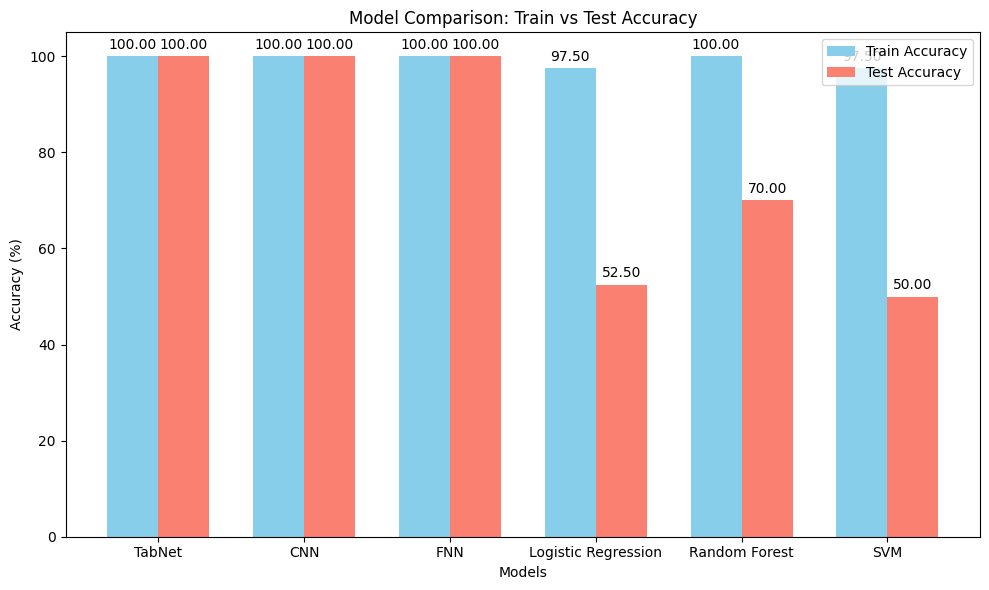

In [ ]:
import matplotlib.pyplot as plt

# Metrics for each model (ensure these variables are defined in your environment)
models = ['TabNet', 'CNN', 'FNN', 'Logistic Regression', 'Random Forest', 'SVM']
train_accuracies = [tabnet_train_accuracy, cnn_train_accuracy, fnn_train_accuracy, train_lr_accuracy*100, train_accuracy*100, svm_train_accuracy*100]
test_accuracies = [tabnet_test_accuracy, cnn_test_accuracy, fnn_test_accuracy, test_lr_accuracy*100, test_accuracy*100, svm_test_accuracy*100]

# Plotting the grouped bar chart
x = range(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35  # Width of the bars

# Creating the bars for train and test accuracies
bars_train = ax.bar(x, train_accuracies, bar_width, label='Train Accuracy', color='skyblue')
bars_test = ax.bar([p + bar_width for p in x], test_accuracies, bar_width, label='Test Accuracy', color='salmon')

# Labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Comparison: Train vs Test Accuracy')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Adding data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(bars_train)
add_labels(bars_test)

plt.tight_layout()
plt.show()
